In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Used_Bikes.csv")
data.head()
# # cleaning of data [bike_name	price	city	kms_driven	owner	age	power	brand]
data = data.dropna()

data = data.drop_duplicates()

In [6]:
## data devide into numerical and categorical
numerical = data.select_dtypes(include=[np.number])
categorical = data.select_dtypes(include="O")

In [7]:
## features selection
categorical= categorical.drop(["bike_name","city"],axis=1)

In [8]:
categorical["owner"].value_counts()
# pd.get_dummies(categorical).astype(int)
df = {
    "First Owner" :1,
    "Second Owner":2,
    "Third Owner":3,
    "Fourth Owner Or More":4
}
categorical["owner"]=categorical["owner"].map(df)

In [9]:
numerical.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [10]:
categorical.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [11]:
brand_dict = {i:key for key,i in enumerate(list(categorical["brand"].unique()))}

In [12]:
categorical["brand"] = categorical["brand"].map(brand_dict)

In [13]:
final_data = pd.concat([numerical,categorical],axis=1)

In [14]:
final_data

,price,kms_driven,age,power,owner,brand
0,35000.0,17654.0,3.0,110.0,1,0
1,119900.0,11000.0,4.0,350.0,1,1
2,600000.0,110.0,8.0,675.0,1,2
3,65000.0,16329.0,4.0,180.0,1,0
4,80000.0,10000.0,3.0,150.0,1,3
...,...,...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0,1,5
9369,35000.0,60000.0,9.0,220.0,1,6
9370,450000.0,3430.0,4.0,750.0,1,14
9371,139000.0,21300.0,4.0,400.0,1,6


In [15]:
## regression
metrix = final_data.corr()
metrix

,price,kms_driven,age,power,owner,brand
price,1.000000,-0.199951,-0.248752,0.807641,-0.005188,0.288409
kms_driven,-0.199951,1.000000,0.367518,-0.168295,0.062612,-0.036161
age,-0.248752,0.367518,1.000000,-0.164211,0.203151,-0.030263
power,0.807641,-0.168295,-0.164211,1.000000,0.043746,0.068647
owner,-0.005188,0.062612,0.203151,0.043746,1.000000,0.005844
brand,0.288409,-0.036161,-0.030263,0.068647,0.005844,1.000000


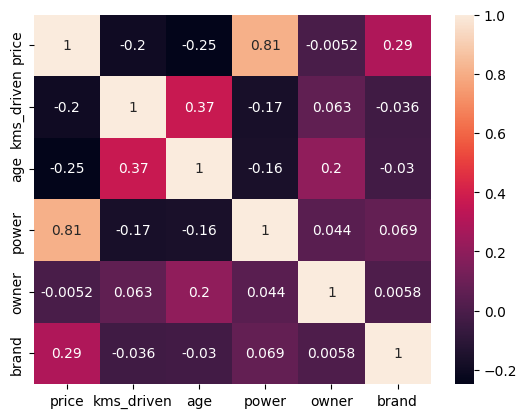

In [16]:
sns.heatmap(metrix,annot=True)
plt.show()

In [17]:
y = final_data["price"]
x = final_data.drop("price",axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
random_state=42

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
model.score(x_test,y_test)

0.7378474181528485

In [21]:
y_pred = model.predict(x_test)
y_pred

array([ 16453.14422214,  19245.42476497,  91052.68410588, ...,
        14776.68682319, 207851.60621906, 128984.41936099], shape=(1465,))

In [22]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1

,Actual,Predicted
2513,24000.0,16453.144222
3440,92000.0,19245.424765
2644,96000.0,91052.684106
2706,140000.0,125147.934809
1601,80000.0,115319.066347
...,...,...
242,175000.0,223090.622872
7172,90000.0,121583.977586
4918,46000.0,14776.686823
2253,90950.0,207851.606219


Text(0.5, 1.0, 'Actual vs Predicted Price')

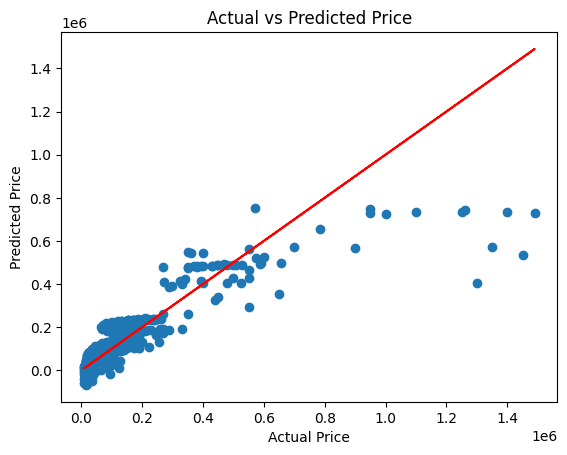

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot(y_test,y_test,color="red")
plt.title("Actual vs Predicted Price")